C:\Users\lenovo\AppData\Local\Temp\ipykernel_24140\2345385439.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(df["order_date"])



--- Order Trends Over Time ---
Orders per month:
 order_date
2023-01    804
2023-02    785
2023-03    903
2023-04    812
2023-05    844
2023-06    784
2023-07    859
2023-08    851
2023-09    812
2023-10    863
2023-11    807
2023-12    849
2024-01     27
Freq: M, Name: order_id, dtype: int64
Revenue per month:
 order_date
2023-01    645818.76
2023-02    630867.40
2023-03    716738.98
2023-04    666097.18
2023-05    668428.61
2023-06    610822.93
2023-07    688559.45
2023-08    694987.58
2023-09    653838.07
2023-10    699187.73
2023-11    637772.43
2023-12    681303.50
2024-01     17201.50
Freq: M, Name: total_amount, dtype: float64


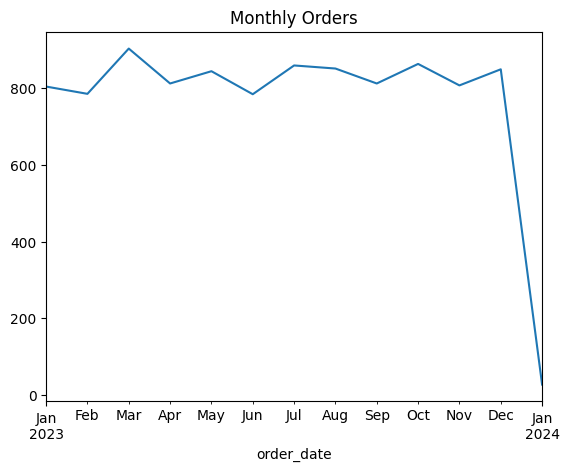

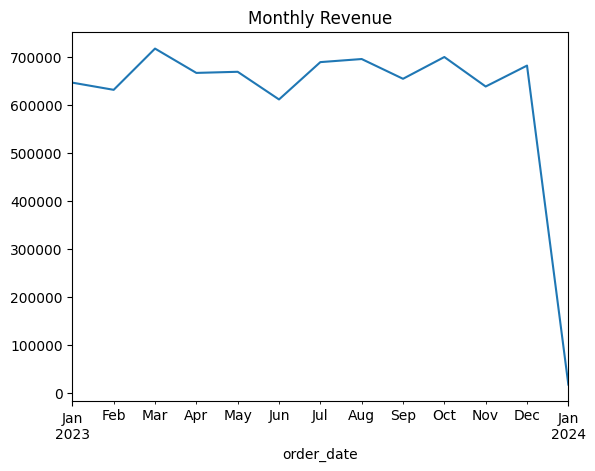


--- User Behaviour Patterns ---
Orders per user:
 count    2883.000000
mean        3.468609
std         1.792682
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: order_id, dtype: float64
Spend per user:
 count     2883.000000
mean      2778.919223
std       1627.276076
min        102.220000
25%       1563.495000
50%       2514.920000
75%       3715.145000
max      11556.490000
Name: total_amount, dtype: float64
High value users (>1000): 2544

--- City-wise & Cuisine-wise Performance ---
City-wise revenue:
 city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64
Cuisine-wise revenue:
 cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: total_amount, dtype: float64


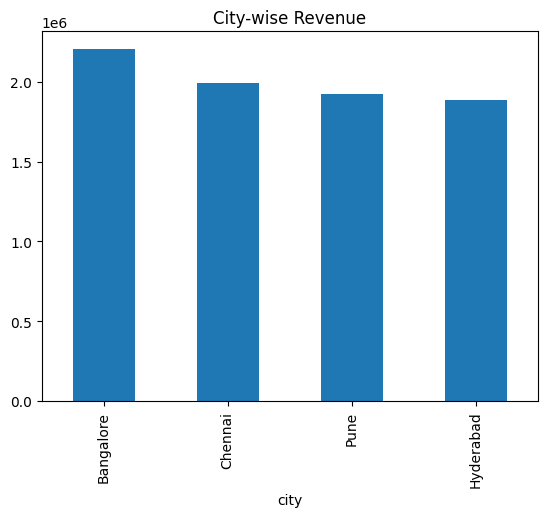

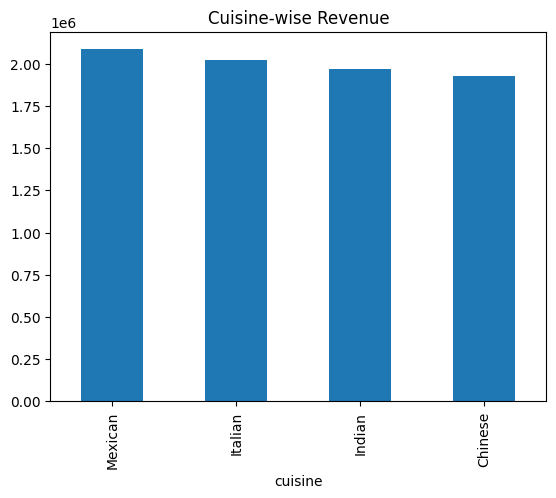


--- Membership Impact ---
Orders by membership:
 membership
Gold       4987
Regular    5013
Name: order_id, dtype: int64
Revenue by membership:
 membership
Gold       3975364.89
Regular    4036259.23
Name: total_amount, dtype: float64
AOV by membership:
 membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

--- Revenue Distribution & Seasonality ---
Quarterly revenue:
 quarter
1    2010626.64
2    1945348.72
3    2037385.10
4    2018263.66
Name: total_amount, dtype: float64
Monthly revenue:
 order_date
1     663020.26
2     630867.40
3     716738.98
4     666097.18
5     668428.61
6     610822.93
7     688559.45
8     694987.58
9     653838.07
10    699187.73
11    637772.43
12    681303.50
Name: total_amount, dtype: float64


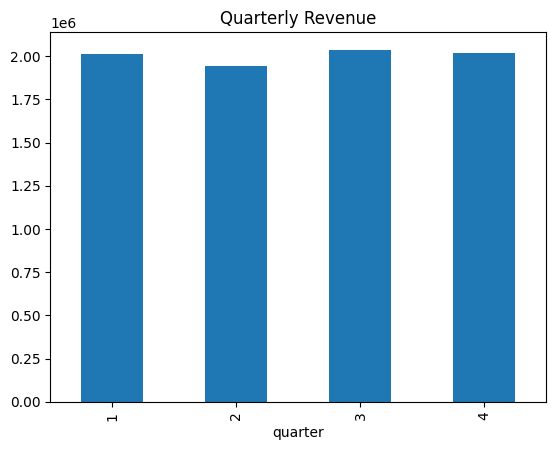

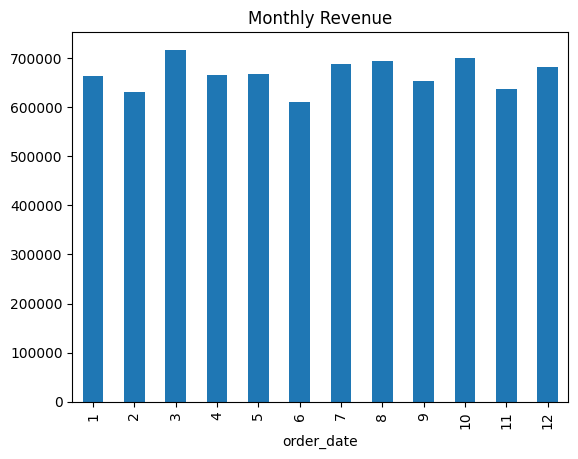

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# =====================================================
# Load Dataset (Single Source of Truth)
# =====================================================
df = pd.read_csv("output/final_dataset.csv")
df["order_date"] = pd.to_datetime(df["order_date"])

# =====================================================
# 1️⃣ Order Trends Over Time
# =====================================================
print("\n--- Order Trends Over Time ---")

orders_monthly = df.groupby(df["order_date"].dt.to_period("M"))["order_id"].nunique()
revenue_monthly = df.groupby(df["order_date"].dt.to_period("M"))["total_amount"].sum()

print("Orders per month:\n", orders_monthly)
print("Revenue per month:\n", revenue_monthly)

# Plot
orders_monthly.plot(title="Monthly Orders")
plt.show()

revenue_monthly.plot(title="Monthly Revenue")
plt.show()


# =====================================================
# 2️⃣ User Behaviour Patterns
# =====================================================
print("\n--- User Behaviour Patterns ---")

orders_per_user = df.groupby("user_id")["order_id"].nunique()
spend_per_user = df.groupby("user_id")["total_amount"].sum()

print("Orders per user:\n", orders_per_user.describe())
print("Spend per user:\n", spend_per_user.describe())

high_value_users = spend_per_user[spend_per_user > 1000]
print("High value users (>1000):", high_value_users.count())


# =====================================================
# 3️⃣ City-wise & Cuisine-wise Performance
# =====================================================
print("\n--- City-wise & Cuisine-wise Performance ---")

city_revenue = df.groupby("city")["total_amount"].sum().sort_values(ascending=False)
cuisine_revenue = df.groupby("cuisine")["total_amount"].sum().sort_values(ascending=False)

print("City-wise revenue:\n", city_revenue)
print("Cuisine-wise revenue:\n", cuisine_revenue)

city_revenue.plot(kind="bar", title="City-wise Revenue")
plt.show()

cuisine_revenue.plot(kind="bar", title="Cuisine-wise Revenue")
plt.show()


# =====================================================
# 4️⃣ Membership Impact (Gold vs Regular)
# =====================================================
print("\n--- Membership Impact ---")

membership_orders = df.groupby("membership")["order_id"].nunique()
membership_revenue = df.groupby("membership")["total_amount"].sum()
membership_aov = df.groupby("membership")["total_amount"].mean()

print("Orders by membership:\n", membership_orders)
print("Revenue by membership:\n", membership_revenue)
print("AOV by membership:\n", membership_aov)


# =====================================================
# 5️⃣ Revenue Distribution & Seasonality
# =====================================================
print("\n--- Revenue Distribution & Seasonality ---")

df["quarter"] = df["order_date"].dt.quarter
quarter_revenue = df.groupby("quarter")["total_amount"].sum()
monthly_revenue = df.groupby(df["order_date"].dt.month)["total_amount"].sum()

print("Quarterly revenue:\n", quarter_revenue)
print("Monthly revenue:\n", monthly_revenue)

quarter_revenue.plot(kind="bar", title="Quarterly Revenue")
plt.show()

monthly_revenue.plot(kind="bar", title="Monthly Revenue")
plt.show()


In [3]:
import pandas as pd

df = pd.read_csv("output/final_dataset.csv")
df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [5]:
import pandas as pd

df = pd.read_csv("output/final_dataset.csv")

gold_df = df[df["membership"] == "Gold"]

city_revenue = (
    gold_df
    .groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

print(city_revenue.head(1))


city
Chennai    1080909.79
Name: total_amount, dtype: float64


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

cuisine_avg_order = (
    df
    .groupby("cuisine")["total_amount"]
    .mean()
    .sort_values(ascending=False)
)

print(cuisine_avg_order.head(1))


cuisine
Mexican    808.021344
Name: total_amount, dtype: float64


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

user_total = (
    df
    .groupby("user_id")["total_amount"]
    .sum()
)

high_value_users = user_total[user_total > 1000]

count_users = high_value_users.count()

print("Number of users with total orders > ₹1000:", count_users)


Number of users with total orders > ₹1000: 2544


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

rating_bins = [3.0, 3.5, 4.0, 4.5, 5.0]
rating_labels = [
    "3.0–3.5",
    "3.6–4.0",
    "4.1–4.5",
    "4.6–5.0"
]

df["rating_range"] = pd.cut(
    df["rating"],
    bins=rating_bins,
    labels=rating_labels,
    include_lowest=True
)

rating_revenue = (
    df
    .groupby("rating_range")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

print(rating_revenue)
print("\nHighest revenue range:")
print(rating_revenue.head(1))


rating_range
4.6–5.0    2197030.75
3.0–3.5    2136772.70
4.1–4.5    1960326.26
3.6–4.0    1717494.41
Name: total_amount, dtype: float64

Highest revenue range:
rating_range
4.6–5.0    2197030.75
Name: total_amount, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_24140\3369135215.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("rating_range")["total_amount"]


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

gold_df = df[df["membership"] == "Gold"]

city_avg_order = (
    gold_df
    .groupby("city")["total_amount"]
    .mean()
    .sort_values(ascending=False)
)

print(city_avg_order.head(1))


city
Chennai    808.45908
Name: total_amount, dtype: float64


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

restaurant_count = (
    df
    .groupby("cuisine")["restaurant_id"]
    .nunique()
    .rename("restaurant_count")
)

revenue_per_cuisine = (
    df
    .groupby("cuisine")["total_amount"]
    .sum()
    .rename("total_revenue")
)

cuisine_summary = pd.concat(
    [restaurant_count, revenue_per_cuisine],
    axis=1
)

result = cuisine_summary.sort_values(
    by=["restaurant_count", "total_revenue"],
    ascending=[True, False]
)

print(result.head(5))


         restaurant_count  total_revenue
cuisine                                 
Chinese               120     1930504.65
Italian               126     2024203.80
Indian                126     1971412.58
Mexican               128     2085503.09


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

total_orders = df["order_id"].nunique()

gold_orders = df[df["membership"] == "Gold"]["order_id"].nunique()

percentage = round((gold_orders / total_orders) * 100)

print(f"Percentage of orders placed by Gold members: {percentage}%")


Percentage of orders placed by Gold members: 50%


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

restaurants_list = [
    "Grand Cafe Punjabi",
    "Grand Restaurant South Indian",
    "Ruchi Mess Multicuisine",
    "Ruchi Foods Chinese"
]

filtered_df = df[df["restaurant_name_x"].isin(restaurants_list)]

summary = (
    filtered_df
    .groupby("restaurant_name_x")
    .agg(
        total_orders=("order_id", "nunique"),
        avg_order_value=("total_amount", "mean")
    )
)

summary = summary[summary["total_orders"] < 20]

result = summary.sort_values("avg_order_value", ascending=False)

print(result)


                     total_orders  avg_order_value
restaurant_name_x                                 
Ruchi Foods Chinese            19       686.603158


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

filtered_df = df[
    ((df["membership"] == "Gold") & (df["cuisine"] == "Indian")) |
    ((df["membership"] == "Gold") & (df["cuisine"] == "Italian")) |
    ((df["membership"] == "Regular") & (df["cuisine"] == "Indian")) |
    ((df["membership"] == "Regular") & (df["cuisine"] == "Chinese"))
]

combo_revenue = (
    filtered_df
    .groupby(["membership", "cuisine"])["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

print(combo_revenue)


membership  cuisine
Gold        Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
Regular     Chinese     952790.91
Name: total_amount, dtype: float64


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

df["order_date"] = pd.to_datetime(df["order_date"])

df["quarter"] = df["order_date"].dt.to_period("Q")

quarter_revenue = (
    df
    .groupby("quarter")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

print(quarter_revenue)


quarter
2023Q3    2037385.10
2023Q4    2018263.66
2023Q1    1993425.14
2023Q2    1945348.72
2024Q1      17201.50
Freq: Q-DEC, Name: total_amount, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_24140\2463552085.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(df["order_date"])


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

gold_orders = df[df["membership"] == "Gold"]["order_id"].nunique()

print("Total orders placed by Gold members:", gold_orders)


Total orders placed by Gold members: 4987


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

hyderabad_df = df[df["city"] == "Hyderabad"]

total_revenue = round(hyderabad_df["total_amount"].sum())

print("Total revenue from Hyderabad:", total_revenue)


Total revenue from Hyderabad: 1889367


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

distinct_users = df["user_id"].nunique()

print("Number of distinct users who placed at least one order:", distinct_users)


Number of distinct users who placed at least one order: 2883


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

gold_df = df[df["membership"] == "Gold"]

avg_order_value = round(gold_df["total_amount"].mean(), 2)

print("Average order value for Gold members:", avg_order_value)


Average order value for Gold members: 797.15


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

high_rated_df = df[df["rating"] >= 4.5]

total_orders = high_rated_df["order_id"].nunique()

print("Total orders for restaurants with rating ≥ 4.5:", total_orders)


Total orders for restaurants with rating ≥ 4.5: 3374


In [ ]:
import pandas as pd

  
df = pd.read_csv("output/final_dataset.csv")    

gold_df = df[df["membership"] == "Gold"]

city_revenue = (
    gold_df
    .groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

top_city = city_revenue.index[0]
print("Top revenue city (Gold members):", top_city)

orders_in_top_city = gold_df[gold_df["city"] == top_city]["order_id"].nunique()

print("Total orders in top revenue city (Gold members):", orders_in_top_city)


Top revenue city (Gold members): Chennai
Total orders in top revenue city (Gold members): 1337


In [ ]:
import pandas as pd

df = pd.read_csv("output/final_dataset.csv")    

print("Total number of rows:", df.shape[0])


Total number of rows: 10000
